In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

In [2]:
kdata = np.load('KeplerSampleFullQ.npy',encoding='bytes')
print(kdata.shape)
print(len(kdata[250][0]))

(2500, 3)
3534


In [7]:
dmints = [-1.2,-0.3,-0.1,-0.05, -0.02,-0.01, -0.006, -0.005, -0.004, -0.0012, 
          -0.001, -0.0006, -0.0003, 0,  0.0003, 0.0006, 0.001, 0.0012, 0.003, 
          0.004, 0.005, 0.006, 0.01, 0.02, 0.05, 0.1, 0.3, 0.6, 1.2]
dtints = [-1.0/145, 1.0/47, 2.0/47, 3.0/47, 4.0/47, 6.0/47, 10.0/47, 15.0/47,
          20.0/47, 30.0/47, 40.0/47,   1.0,   1.2,  
           1.4,  1.5, 1.7,  2, 2.25,  2.5, 3.0, 4, 6 , 9, 15, 20, 30, 45, 60, 90]

def pairwisediffs(arrayoned):
    x = arrayoned.reshape((1,len(arrayoned)))
    xdm = x[:] - np.transpose(x[:])
    xd = xdm[np.triu_indices(len(x[0]), k = 1)]
    return(xd)
def get2dhist(lightcurve):
    xd = pairwisediffs(lightcurve[0])
    yd = pairwisediffs(lightcurve[1])
    H,xe,ye = np.histogram2d(xd,yd,bins=[dtints,dmints],range=None,normed=False)
    G = 255*H/np.sum(H)
    return G

In [13]:
fastdmdt = get2dhist([kdata[250][0],kdata[250][1]])
fastdmdt

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 4.08469838e-05, 0.00000000e+00, 0.00000000e+00,
        1.79726729e-03, 3.18606474e-03, 1.39696685e-02, 2.28743109e-02,
        2.93281344e-02, 3.05943909e-02, 2.18122894e-02, 1.36428926e-02,
        2.69590093e-03, 2.20573713e-03, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 4.08469838e-05, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 4.08469838e-05, 0.00000000e+00, 0.00000000e+00,
        2.00150221e-03, 2.53251300e-03, 1.44598323e-02, 2.16489014e-02,
        3.07577788e-02, 3.03901560e-02, 2.06685738e-02, 1.45823732e-02,
        2.85928887e-03, 2.08319618e-03, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 4.08469838e-05, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000

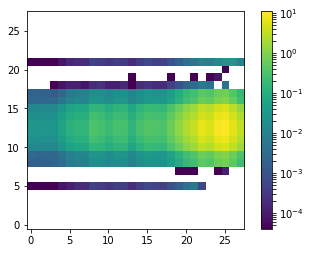

In [9]:
plt.imshow(fastdmdt.T,  norm = LogNorm(), origin="lower")
plt.colorbar()

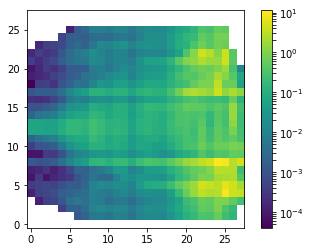

In [15]:
def plotme(n):
    fastdmdt = get2dhist([kdata[n][0],kdata[n][1]])
    plt.imshow(fastdmdt.T,  norm = LogNorm(), origin="lower")
    plt.colorbar()
    
def save_dmdt(n):
    fastdmdt = get2dhist([kdata[250][0],kdata[250][1]])
    np.save("full_dmdt/im_" + str(n), fastdmdt.T)
    return fastdmdt.T
    
plotme(0)

In [16]:
data = []
for i, _ in enumerate(kdata):
    temp = save_dmdt(i)
    data.append(temp)
    
data = np.array(data)

In [17]:
data.shape

(2500, 28, 28)

In [25]:
import umap
import sklearn
from sklearn.manifold import TSNE
tt = data.reshape(2500, 784)

In [26]:
x_embedded_tsne_first = TSNE(n_components=2).fit_transform(tt)
x_embedded_umap_first = umap.UMAP().fit_transform(tt)

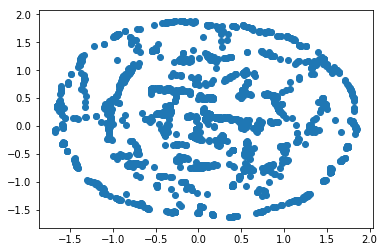

In [27]:
plt.scatter(x_embedded_tsne_first[:, 0], x_embedded_tsne_first[:, 1])


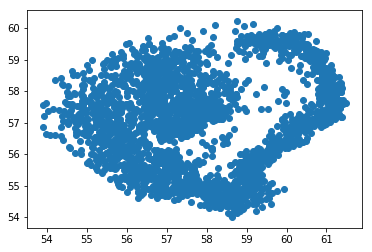

In [28]:
plt.scatter(x_embedded_umap_first[:, 0], x_embedded_umap_first[:, 1])
